In [91]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime as dt

warnings.simplefilter(action='ignore', category=Warning)

from funcs.data_prep import *
from funcs.eda import *

## Veri Setinin Yüklenmesi

In [4]:
df = pd.read_excel("../datasets/online_retail_II.xlsx", index_col=0)

In [5]:
df_copy = df

In [6]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
check_df(df)

##################### Shape #####################
(525461, 7)
##################### Types #####################
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 489434 to 538171
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    525461 non-null  object        
 1   Description  522533 non-null  object        
 2   Quantity     525461 non-null  int64         
 3   InvoiceDate  525461 non-null  datetime64[ns]
 4   Price        525461 non-null  float64       
 5   Customer ID  417534 non-null  float64       
 6   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object

In [8]:
df["NEW_RETURNED"] = [1 if i < 0 else 0 for i in df["Quantity"]]

In [9]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0


In [10]:
df["NEW_RETURNED"].value_counts()

0    513135
1     12326
Name: NEW_RETURNED, dtype: int64

In [24]:
df["Quantity"] = [abs(i) if i < 0 else i for i in df["Quantity"]]

In [25]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0


In [30]:
code_lit = df["StockCode"].unique()

In [32]:
for i in code_lit:
    print(i)

85048
79323P
79323W
22041
21232
22064
21871
21523
22350
22349
22195
22353
48173C
21755
21754
84879
22119
22142
22296
22295
22109
22107
22194
35004B
82582
21181
21756
21333
84596F
84596L
22111
22143
22145
22130
21364
21360
21351
21352
35400
20695
37370
10002
84507B
20703
21987
21989
84970S
20971
22271
22272
22274
21912
22112
21329
21252
21100
21033
20711
21410
21411
84031A
84031B
84032A
84032B
84519A
84519B
85132A
85132C
85183A
85183B
22065
22138
22139
22352
85014A
85014B
16161P
16169N
21491
22333
85216
21493
21731
85232B
84691
20749
POST
22321
84029E
21955
84899E
85123A
21582
21586
21590
22091
84251J
22024
22026
22029
22025
22031
21428
21430
21916
21790
21888
85178
20754
21035
82001S
82580
85150
21041
35916C
35916B
22180
22128
22163
35951
22253
84988
22219
18097C
21299
21099
21085
21929
22241
21091
21733
22178
22125
21671
22086
22294
22199
22083
22114
21485
21928
85099B
22356
20724
21592
20725
20728
20726
21217
85066
20827
20825
20823
20826
22087
85206A
21895
21896
84946
22090
90200A
9

79323G
84358
22101
84920
21811
16156S
20765
21137
22246
51008
21107
84509B
22339
21810
79534
82615
21354
22095
20934
21610
72802A
35004C
85220
21341
21323
21504
21340
21347
84947
22184
71459
84371
21734
22181
21448
22322
84795C
21304
35649
35646
35651
35648
16212
35096A
85222
85230F
21286
21359
79191C
22216
85065
21703
21205
84692
22049
84926B
21464
20668
21009
84562B
75049L
22148
84078A
20772
21709
22278
84925E
84925A
21739
47503F
90042B
90042A
84989A
85113
85107
20976
85049F
85170C
85039B
21078
84292
21981
17109A
17109C
20998
21645
21026
22344
22346
22345
22343
17084R
21838
21983
85135A
72796A
72796B
85035C
85035A
20869
79190B
90214S
90214J
16258B
20986
20985
37348
72817
22279
21992
18097B
85221
84526
22096
85088
37474
21933
21932
84532B
21163
21663
72811
22175
22176
84802B
84597C
84520D
84925C
82552
21609
21102
20621
21312
21617
22123
22313
82616C
21253
47580
35599B
84968E
84660C
79065A
37476
22354
84623
84619
21628
79320
22227
84405A
21729
20889
21327
21425
21614
21135
21106
21007


90194
72708
16169G
21117
85062
20663
84414B
16051
85072
90138
90137
16119
47552A
47567B
84815
72131
35631B
22252
72728
20884
20877
20881
22242
90177C
90177B
90177D
90177E
90177A
90026C
90069
84876B
17090A
85215
21758
20848
84859C
84859A
75131
85109
84802A
35607B
21202
90001C
79340P
35607A
85218
35001C
16207B
35936
20939
72785A
72785B
21766
21686
84689
84550
21226
21225
16258A
37491C
75011
72801C
46775E
35911B
62097A
72812
21473
90000C
90065B
90182C
90026B
90212C
21317
62074B
84876C
35999
90201A
20697
17090D
85230A
72133
72134
72130
37489A
85225
21441
84711A
90140
90146
90123A
90060B
22243
47369B
72772
35910A
21716
21715
37438
46775D
84921
22360
21190
22247
22249
22250
85213
71101A
71101E
20882
15030
72793
35637A
16256C
21416
22268
35597B
84255A
21318
18098B
37399
TEST001
37475
21036
17007B
84621
84251C
22021
85206B
90129A
35001P
84824
44234
18098A
20858
21298
72750B
21750
17038
21406
21919
35818C
48175
85091
90018A
90018C
90027C
90038B
90054
90077
90178B
90198A
90211A
gift_0001_80
DCGS

84968d
85123a
15056n
84968e
84424A
85115B
37479P
84493
90179C
84857C
78034B
90118
90063A
85114A
22701
90119
75172
22703
22702
84534b
85099c
85049e
47566b
85049b
84510a
15056p
84997b
84536b
84660b
85014a
47570b
84985a
22640
ADJUST2
90142A
90051
22692
22660
22687
22691
22690
22689
22688
22629
22628
22700
22630
47503J 
22669
84968a
47590a
85132c
84509e
21048
21920
22668
22656
22655
22666
22667
22665
20852
22126
45014
85074
85073
22639
22638
22641
22642
22643
22604
22596
22602
22600
22603
22595
22593
22588
22589
22591
22573
22581
22579
22578
22577
22601
22594
22576
22574
22652
44092B
22575
22653
22654
22661
22662
22663
22580
22651
85184d
85124c
22572
22664
22963
22961
22571
22599
22597
22598
85099f
22592
22694
22696
22695
84968b
82001s
84510b
84660a
22693
22752
22753
22754
22756
22757
22755
22759
22758
22743
22744
22742
22697
22698
22699
C3
47591d
85049a
22680
22681
22677
22678
22679
22682
22683
22684
22685
22686
22670
22671
22672
22673
22674
22675
22676
90021
85095
22851
84201C
84206B
223

In [64]:
df[df["StockCode"] == "AMAZONFEE"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
C531400,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom,1
531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom,0
C537600,AMAZONFEE,AMAZON FEE,1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,1
C537630,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,1
537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,0
C537644,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,1
C537647,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,1
C537651,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,1
C537652,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom,1


In [62]:
df[df["StockCode"] == "B"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,0
A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,0
A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,0


In [60]:
dcg = [i for i in df["StockCode"] if str(i).startswith('DCG')]

In [61]:
dcg

['DCGS0058',
 'DCGS0068',
 'DCGS0004',
 'DCGS0058',
 'DCGS0076',
 'DCGS0076',
 'DCGS0058',
 'DCGS0076',
 'DCGS0003',
 'DCGS0076',
 'DCGS0058',
 'DCGS0072',
 'DCGS0076',
 'DCGS0058',
 'DCGS0058',
 'DCGS0044',
 'DCGS0058',
 'DCGS0072',
 'DCGS0058',
 'DCGS0058',
 'DCGS0058',
 'DCGS0072',
 'DCGS0058',
 'DCGS0066N',
 'DCGS0066N',
 'DCGS0066N',
 'DCGS0066N',
 'DCGS0058',
 'DCGS0058',
 'DCGS0068',
 'DCGS0076',
 'DCGSSGIRL',
 'DCGS0006',
 'DCGS0016',
 'DCGS0027',
 'DCGS0036',
 'DCGS0039',
 'DCGS0060',
 'DCGS0056',
 'DCGS0059',
 'DCGS0076',
 'DCGSLBOY',
 'DCGS0053',
 'DCGS0004',
 'DCGS0062',
 'DCGS0037',
 'DCGSSBOY',
 'DCGSLGIRL',
 'DCGS0058',
 'DCGS0076',
 'DCGS0058',
 'DCGS0069',
 'DCGS0058',
 'DCGS0058',
 'DCGS0069',
 'DCGS0070',
 'DCGS0075',
 'DCGS0069',
 'DCGS0004',
 'DCGS0076',
 'DCGS0058',
 'DCGS0058',
 'DCGS0058',
 'DCGS0076',
 'DCGS0041',
 'DCGS0003',
 'DCGS0037',
 'DCGS0003',
 'DCGSSBOY',
 'DCGSSGIRL',
 'DCGS0058',
 'DCGS0003',
 'DCGSSBOY',
 'DCGSSGIRL',
 'DCGSSBOY',
 'DCGSSGIRL',
 'D

In [54]:
df[df["StockCode"] == "DCGSSGIRL"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
496722,DCGSSGIRL,NaN,1,2010-02-03 14:04:00,0.00,NaN,United Kingdom,1
512738,DCGSSGIRL,update,100,2010-06-17 14:11:00,0.00,NaN,United Kingdom,0
513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,NaN,United Kingdom,0
513200,DCGSSGIRL,GIRLS PARTY BAG,6,2010-06-22 16:28:00,3.36,NaN,United Kingdom,0
513574,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-25 15:13:00,3.36,NaN,United Kingdom,0
513655,DCGSSGIRL,GIRLS PARTY BAG,5,2010-06-28 10:02:00,3.36,NaN,United Kingdom,0
513907,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-29 12:08:00,3.36,NaN,United Kingdom,0
526405,DCGSSGIRL,GIRLS PARTY BAG,6,2010-10-11 13:53:00,3.36,NaN,United Kingdom,0
530060,DCGSSGIRL,GIRLS PARTY BAG,2,2010-11-01 11:35:00,3.36,NaN,United Kingdom,0


In [53]:
df[df["StockCode"] == "ADJUST"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE,0
495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE,0
495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE,0
495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE,0
C495737,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,10.50,16154.0,United Kingdom,1
...,...,...,...,...,...,...,...,...
495802,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:28:00,387.54,12748.0,United Kingdom,0
C495803,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:29:00,59.10,NaN,EIRE,1
C509473,ADJUST,Adjustment by Peter on 24/05/2010 1,1,2010-05-24 11:12:00,300.13,17050.0,United Kingdom,1


In [52]:
df[df["StockCode"] == "PADS"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom,0
496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom,0
496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom,0
496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom,0
497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom,0
498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom,0
499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom,0
499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom,0
501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom,0


In [49]:
gift = [i for i in df["StockCode"] if str(i).startswith('gift')]

In [51]:
len(gift)

66

In [46]:
df[df["StockCode"] == "BANK CHARGES"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
C490943,BANK CHARGES,Bank Charges,1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom,1
490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom,0
C492206,BANK CHARGES,Bank Charges,1,2009-12-15 16:32:00,848.43,NaN,United Kingdom,1
C494438,BANK CHARGES,Bank Charges,1,2010-01-14 12:15:00,767.99,NaN,United Kingdom,1
498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom,0
...,...,...,...,...,...,...,...,...
C532203,BANK CHARGES,Bank Charges,1,2010-11-11 12:31:00,15.00,NaN,United Kingdom,1
532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.0,United Kingdom,0
535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.0,United Kingdom,0


In [34]:
discount = [i for i in df["StockCode"] if i == "D"]

In [41]:
test = [i for i in df["StockCode"] if str(i).startswith('TEST')]

In [42]:
test

['TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST002',
 'TEST002',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001']

In [43]:
manual = [i for i in df["StockCode"] if i == "M"]

In [90]:
df[df["StockCode"] == "M"]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom,0
C489651,M,Manual,1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom,1
C489859,M,Manual,1,2009-12-02 14:45:00,69.57,NaN,United Kingdom,1
C490126,M,Manual,1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom,1
C490129,M,Manual,1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom,1
...,...,...,...,...,...,...,...,...
537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.0,United Kingdom,0
537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.0,United Kingdom,0
537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.0,United Kingdom,0


In [65]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0


In [82]:
df.isnull().sum()

StockCode            0
Description       2928
Quantity             0
InvoiceDate          0
Price                0
Customer ID     107927
Country              0
NEW_RETURNED         0
dtype: int64

In [81]:
df.groupby("Customer ID").agg({"Price": ["sum", "mean"],
                              "Quantity": "sum"})

Price            Quantity
                sum       mean      sum
Customer ID                            
12346.0      578.36  12.573043       88
12347.0      162.95   2.295070      828
12348.0       14.39   0.719500      373
12349.0      899.49   8.406449      998
12351.0       49.46   2.355238      261
...             ...        ...      ...
18283.0      498.82   2.168783      336
18284.0      116.09   4.003103      495
18285.0      100.20   8.350000      145
18286.0      306.55   4.379286      624
18287.0      244.34   2.841163     1429

[4383 rows x 3 columns]

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,12.543528,107.188930,1.00,1.00,3.0,11.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00
NEW_RETURNED,525461.0,0.023457,0.151352,0.00,0.00,0.0,0.00,1.00


In [79]:
df[df["Price"] > 5000]

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
495798,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:25:00,5117.03,NaN,United Kingdom,0
496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom,0
C496116,M,Manual,1,2010-01-29 11:05:00,8985.60,17949.0,United Kingdom,1
C501751,M,Manual,1,2010-03-19 11:30:00,6958.17,15760.0,Norway,1
501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.0,Norway,0
501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760.0,Norway,0
C501769,M,Manual,1,2010-03-19 11:49:00,6958.17,15760.0,Norway,1
C501771,M,Manual,1,2010-03-19 11:53:00,5795.87,15760.0,Norway,1
501772,M,Manual,1,2010-03-19 11:56:00,5795.87,NaN,United Kingdom,0


In [72]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 525461
Variables: 8
cat_cols: 1
num_cols: 3
cat_but_car: 3
num_but_cat: 1


In [73]:
cat_cols

['NEW_RETURNED']

In [74]:
num_cols

['Quantity', 'Price', 'Customer ID']

In [83]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.05, q3=0.95))

Quantity True
Price True
Customer ID False


In [69]:
df["Country"].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

# RFM Analysis

In [105]:
df_copy.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0


In [93]:
df.tail()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,NEW_RETURNED
Invoice,,,,,,,,
538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0
538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 489434 to 538171
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   StockCode     525461 non-null  object        
 1   Description   522533 non-null  object        
 2   Quantity      525461 non-null  int64         
 3   InvoiceDate   525461 non-null  datetime64[ns]
 4   Price         525461 non-null  float64       
 5   Customer ID   417534 non-null  float64       
 6   Country       525461 non-null  object        
 7   NEW_RETURNED  525461 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 52.2+ MB


In [95]:
df_data = df

In [96]:
filtered_data = df_data[["Country", "Customer ID"]].drop_duplicates()

In [97]:
filtered_data.head()

,Country,Customer ID
Invoice,,
489434,United Kingdom,13085.0
489436,United Kingdom,13078.0
489437,United Kingdom,15362.0
489438,United Kingdom,18102.0
489439,France,12682.0


<AxesSubplot:>

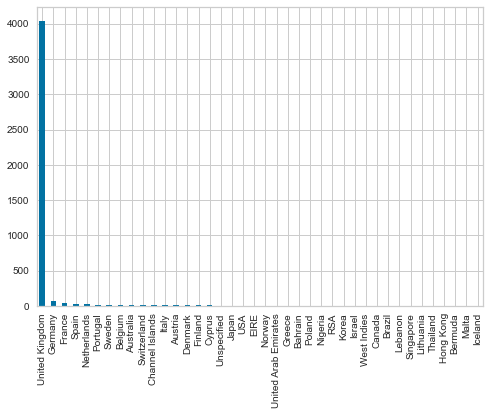

In [99]:
filtered_data.Country.value_counts().plot(kind='bar')

In [102]:
uk_data=df[df.Country=='United Kingdom']

In [103]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485852 entries, 489434 to 538171
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   StockCode     485852 non-null  object        
 1   Description   482924 non-null  object        
 2   Quantity      485852 non-null  int64         
 3   InvoiceDate   485852 non-null  datetime64[ns]
 4   Price         485852 non-null  float64       
 5   Customer ID   379423 non-null  float64       
 6   Country       485852 non-null  object        
 7   NEW_RETURNED  485852 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 33.4+ MB


In [104]:
uk_data.describe()

,Quantity,Price,Customer ID,NEW_RETURNED
count,485852.000000,485852.000000,379423.000000,485852.000000
mean,11.056445,4.543470,15559.935694,0.022464
std,85.655276,149.623198,1593.744626,0.148186
min,1.000000,-53594.360000,12346.000000,0.000000
25%,1.000000,1.250000,14210.000000,0.000000
50%,3.000000,2.100000,15581.000000,0.000000
75%,10.000000,4.210000,16938.000000,0.000000
max,10200.000000,25111.090000,18287.000000,1.000000
